<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/notebooks/well_transient_response_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')


In [2]:
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 560 (delta 53), reused 0 (delta 0), pack-reused 460
Receiving objects: 100% (560/560), 1.11 MiB | 2.83 MiB/s, done.
Resolving deltas: 100% (295/295), done.


In [3]:
import sys
sys.path.append('/content/pyreservoir/welltest')

from wellflo import *

## Multirate Test

|Hours|Rate (STB/D)|
|:--:|:--:|
|$$0 < t \leq 10$$|1000|
|$$10 < t \leq 20$$|2000|
|$$20 < t \leq 30$$|3000|
|$$30 < t \leq 45$$|1500|
|$$45 < t \leq 65$$|0|
|$$65 < t \leq 70$$|1000|


51.19453924914676
valid
valid


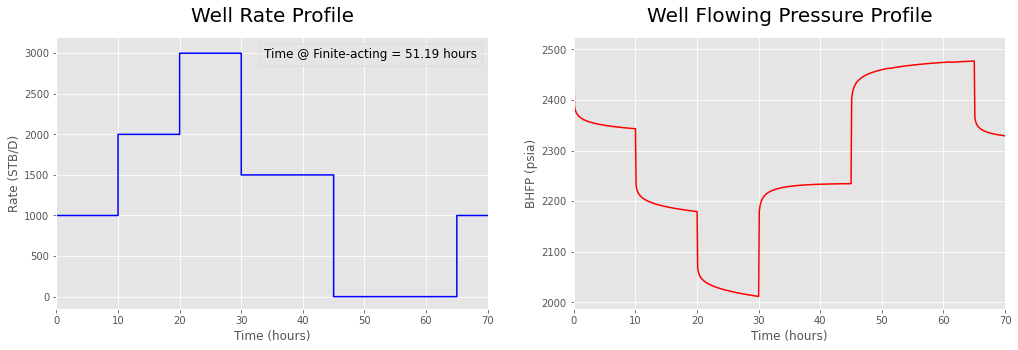

In [9]:
# known
poro = 0.15 # Porosity
ct = 12E-6 # Total compressibility, sip
perm = 600 # Permeability, md
rw = 4 * .08333 # Radius of wellbore, convert inch to ft
h = 32 # Reservoir thickness, ft
mu = 2 # Oil viscosity, cp
re = 3000 # Distance from centre of wellbore to outer reservoir boundary, ft
Bo = 1.333 # Oil FVF, RB/STB

# define initial conditions
p_initial = 2500 # Initial pressure, psia

# define time step (simulation starts from 0 hour)
t_step = .1

# define rate steps
t_change = np.array([10, 20, 30, 45, 65, 70])
q_change = np.array([1000, 2000, 3000, 1500, 0, 1000])

# calculate time at flow start to behave finite-acting
t_finite_acting = time_finite_acting(perm, poro, mu, ct, rw, re)
print(t_finite_acting)

# check validity of using the flow solution approaches
check_validity('constant_rate', 'infinite', 0.1, rw, re, perm, poro, mu, ct)
check_validity('constant_rate', 'finite', t_finite_acting, rw, re, perm, poro, mu, ct)

# simulate!
simulate_multirate_test(p_initial, t_step, t_change, q_change,
                        re, rw, perm, poro, mu, ct, Bo, h)

## Multiple Pressure Test

214.14709228401261
valid
valid


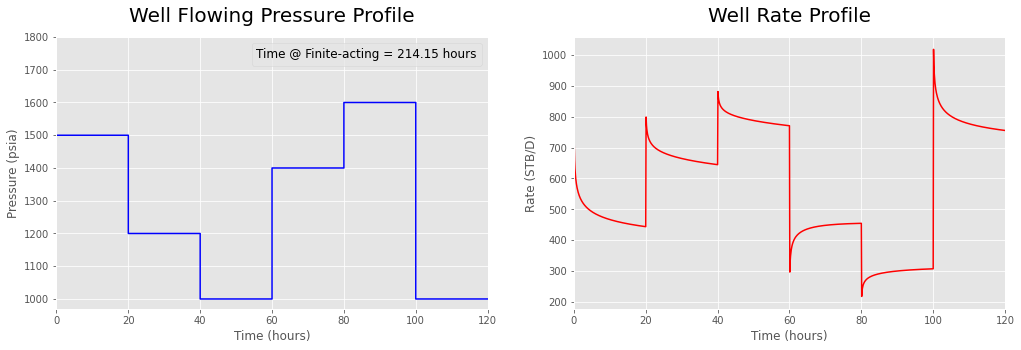

In [5]:
# known
poro = 0.2 # Porosity
ct = 6E-6 # Total compressibility, sip
perm = 85 # Permeability, md
rw = 0.5 # Radius of wellbore, convert inch to ft
h = 45 # Reservoir thickness, ft
mu = 4 # Oil viscosity, cp
re = 2000 # Distance from centre of wellbore to outer reservoir boundary, ft
Bo = 1.333 # Oil FVF, RB/STB

# define initial conditions
p_initial = 2100 # Initial pressure, psia

# define time step (simulation starts from 0 hour)
t_step = .1

# define rate steps
# t_change = np.array([24, 48, 72])
# p_change = np.array([1500, 1200, 1800])
t_change = np.array([20, 40, 60, 80, 100, 120])
p_change = np.array([1500, 1200, 1000, 1400, 1600, 1000])

# calculate time at flow start to behave finite-acting
t_finite_acting = time_finite_acting(perm, poro, mu, ct, rw, re)
print(t_finite_acting)

# check validity of using the flow solution approaches
check_validity('constant_rate', 'infinite', 0.1, rw, re, perm, poro, mu, ct)
check_validity('constant_rate', 'finite', t_finite_acting, rw, re, perm, poro, mu, ct)

# simulate!
simulate_multipressure_test(p_initial, t_step, t_change, p_change,
                            re, rw, perm, poro, mu, ct, Bo, h)
